<center><h2>DSSP<br>Lab: 22/11/2019<br>Web Mining using Python<br></h2>G. Nikolentzos, J. Read, M. Vazirgiannis</center>

## 1. Description

In this lab, we will develop some algorithms to extract implicit and useful information from web data. The lab is divided into two parts. In the first part, we will implement the PageRank algorithm and use it to measure the importance of some webpages. In the second part of the lab, we will build a recommender system to make predictions related to reviews of movies.

## 2. Pagerank
Pagerank is an algorithm that was invented by Larry Page and Sergey Brin to measure the importance of webpages (http://en.wikipedia.org/wiki/PageRank). In the Pagerank model, each page transfers evenly its importance to the pages that it links to. Hence, the importance of a webpage depends on the pages that link to it. In this part of the lab, we will compute the Pagerank scores of some of the webpages of École Polytechnique. The graph is stored in the `polytechnique.edgelist` file as an edge list, where a domain is connected to another domain if there is at least one link from one of the pages of the former to one of the pages of the latter.

Load the network data into a directed graph $G$, using the `read_edgelist` function. The general syntax of the function is the following:
```python
read_edgelist(path, comments='#', delimiter=None, create_using=None, nodetype=None)
```
In this case, we are interested in creating a directed graph. To create a directed graph, use the parameter `create_using=nx.DiGraph()`. Note also that the delimiter is the space character and that the nodes are in string format (use the `nodetype=str` parameter).

In [1]:
import networkx as nx

# G is our graph
G=nx.read_edgelist('data/polytechnique.edgelist', comments='#', delimiter=' ', create_using=nx.DiGraph(), nodetype=str)

Our graph $G$ can be represented by its adjacency matrix $A$. If $[A]_{ij}$ is the element in the $i$-th row and $j$-th column of matrix $A$, the adjacency matrix $A$ of $G$ can be defined as follows:
$$
[A]_{ij} = \left\{
  \begin{array}{lr}
    1 & \text{if }(v_i,v_j) \in E,\\
    0 & \text{otherwise}
  \end{array}
\right.
$$
where $v_i$, $v_j$ are vertices of $G$, and $(v_i,v_j)$ is an edge starting at vertex $v_i$ and ending at vertex $v_j$.


We will next compute the Markov matrix $Q$ given by

$$ Q = d P + (1-d) T $$

where $P$ is the $n$ by $n$ matrix whose entries are equal to $[P]_{ij} = \frac{[A]_{ij}}{outdeg(j)}$ (and equal to $\frac{1}{n}$ for nodes that have out-degree 0), (where outdeg(j) = the number of OUT vertices from node j), while $T$ is the $n$ by $n$ “teleportation” matrix, i.e. the matrix each of whose entries is $\frac{1}{n}$. To get the adjacency matrix of the graph into an `NumPy` array use the following code. Note that you should get the transpose of the returned matrix.

In [2]:
import numpy as np

# Get the adjacency matrix
A = nx.to_numpy_matrix(G) # A = the adjacency matrix 
A = np.transpose(A)       # Get the Transpose of this adjacency matrix

Matrix $Q$ has a unique eigenvector $\mathbf{v}$ with eigenvalue $1$. The entries of $\mathbf{v}$ correspond to the Pagerank scores of the nodes in the graph. Given a vector $\mathbf{w}$ whose sum of the entries is $1$, $Q^k \mathbf{w}$ converges to $\mathbf{v}$ as $k \rightarrow \infty$. We next initialize a nonzero vector whose entries are all nonnegative and we repeatedly multiply by $Q$ to get $Q \mathbf{w}$, $Q^2 \mathbf{w}$, $Q^3 \mathbf{w}$, and so on. These vectors converge to $\mathbf{v}$. So we keep going until the sequence settles down, i.e. until $Q^{k+1} \mathbf{w}$ is nearly equal to $Q^k \mathbf{w}$. Then $Q^k \mathbf{w}$ is the Pagerank vector $\mathbf{v}$. The main steps of the PageRank algorithm are as follows:

1. Compute matrix $Q = dP + (1-d)T$
2. Initialize a vector $\mathbf{v}_1$ randomly whose componenets sum to 1
3. Initialize another vector $\mathbf{v}_2$ whose componenets are large and equal to each other
4. While the norm of the difference of $\mathbf{v}_1$ and $\mathbf{v}_2$ is larger than a small value (e.g., $10^{-6}$)
    - Set $\mathbf{v}_2 = \mathbf{v}_1$
    - Update $\mathbf{v}_1$ as $\mathbf{v}_1 = Q \mathbf{v}_1$
    
5. Return $\mathbf{v}_1$


Write a function that takes as input the adjacency matrix of a graph $G$ and a damping factor `d`, and returns the PageRank vector.

In [3]:
A.shape

(86, 86)

In [4]:
def pagerank(A, d):
    # Create markov matrix P
    P = np.zeros(A.shape)

    sums = np.zeros(A.shape[1])
    for i in range(A.shape[1]):
        sums[i] = sum(A[:,i])

    for i in range(A.shape[1]):
        for j in range(A.shape[0]):
            if sums[i] > 0:
                P[j,i] = A[j,i]/sums[i]
            else:
                P[j,i] = 1.0/A.shape[0]
                
    # My code here
    T=np.zeros(A.shape) + 1.0/A.shape[0] # T = the teleportation matrix (ie a way be able anywhere, but lower probability)
    # Compute matrix Q :
    Q=d*P + (1-d)*T
    
    v_random=np.random.rand(A.shape[0])
    v1=v_random / v_random.sum() # This is to get random values where sum of values equal to 1
    v2=np.zeros(A.shape[0]) + 100.0 # Add a value of 100 everywhere
    steps=0
    while np.linalg.norm(v1-v2) > 1e-6 : # norm of the difference
        steps+=1
        v2=v1
        v1=Q.dot(v1)
    print("Steps:",steps)
    return v1

Compute the PageRank scores of the webpages of École Polytechnique. Set the damping factor equal to 0.85. Which webpage of École Polytechnique has the highest PageRank score?

In [5]:
#your code here

PageRank=pagerank(A, 0.85)
#print(PageRank)
#print(G.nodes())

# Higest Page Rank :
#higth_PG=PageRank.argmax()
#print(higth_PG)

for i,node in enumerate(G.nodes()):
    if i==PageRank.argmax() :
        print("max --> PageRank of ",node, " is ",PageRank[i])
    elif i==PageRank.argmin() :
        print("min --> PageRank of ",node, " is ",PageRank[i])
    else:
        print("        PageRank of ",node, " is ",PageRank[i])


Steps: 15
max --> PageRank of  www.polytechnique.edu  is  0.12096544258517186
        PageRank of  www.polytechnique.edu/annuaire  is  0.03673222876299751
        PageRank of  www.polytechnique.edu/fr/actes-officiels  is  0.015547228737245187
        PageRank of  presse-polytechnique.fr/accueil  is  0.01612180124193153
        PageRank of  presse-polytechnique.fr/mediatheque  is  0.016774351523315547
        PageRank of  communication.polytechnique.fr/rapports_annuels/2017/a_lifetime_of_science/index.html  is  0.01612180124193153
        PageRank of  www.polytechnique.edu/fr/newsletter  is  0.015494636295066347
        PageRank of  portail.polytechnique.edu/admissions/fr  is  0.01612180124193153
        PageRank of  portail.polytechnique.edu/bachelor/fr  is  0.01612180124193153
        PageRank of  www.polytechnique.edu/elearning  is  0.020194703441313255
        PageRank of  www.polytechnique.edu/fr/recherche-partenariale  is  0.015464556445534522
        PageRank of  exed.polytechniq

In [6]:
# Convert the nodes into a list
# then, use the index of the Page Rank to access the Node
print('the Highest page rank is for : ',list(G.nodes())[PageRank.argmax()])
print('the Lowest page rank is for : ',list(G.nodes())[PageRank.argmin()])

the Highest page rank is for :  www.polytechnique.edu
the Lowest page rank is for :  www.polytechnique.edu/fr/textesofficiels


Did you expect that result?

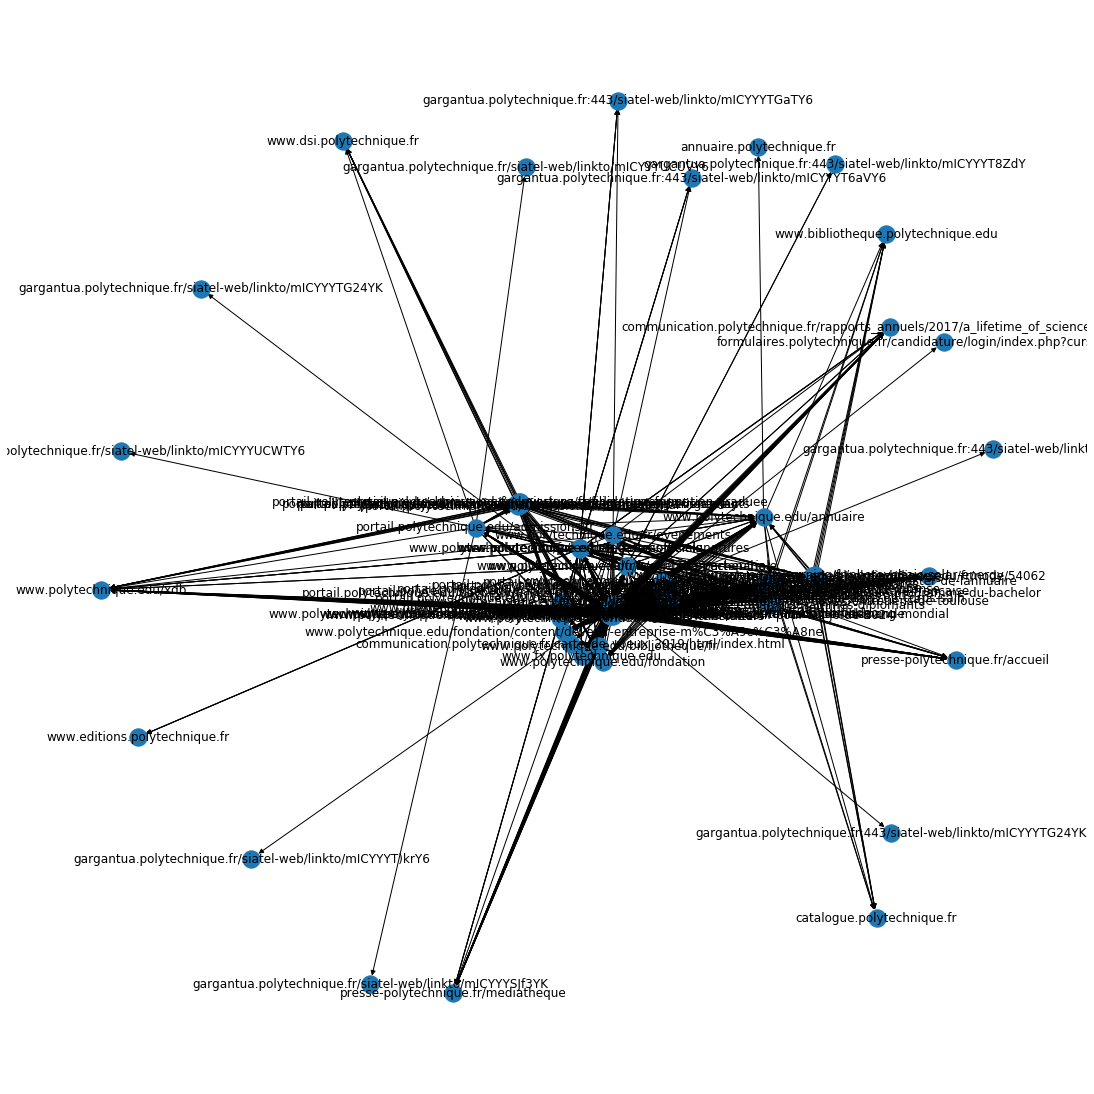

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=[15,15])
nx.draw(G,with_labels=True)

## 2. Collaborative Filtering
In recent years, there has been a lot of research activity in building recommender systems. Specifically, Netflix, a film rental company in the United States, sponsored a $1 million competition to improve the quality of recommendations (http://www.netflixprize.com/). The task was to predict user ratings for films, based on previous ratings without any other information about the users or films.

There are many types of recommendation systems but the most popular are:
<ul>
  <li>Content-based filtering that uses (often text) features to find similar items</li>
  <li>Collaborative filtering that uses ratings supplied (either implicitly or explicitly) by users</li>
</ul>

In this lab, we will concentrate on collaborative filtering.

The classic example is to recommend a movie given some ratings from users. Take, for example, the following matrix.

In [8]:
import numpy as np
import pandas as pd

content = np.array([[4, 5, 0, 2],[5, 3, 1, 0],[1, 2, 5, 0],[2, 0, 0, 4]])

df = pd.DataFrame(content, index=['Antoine', 'Marc', 'Marie','Jean'], columns=['Jurassic Park', 'Cast Away', 'Titanic', 'Amelie'])
df

,Jurassic Park,Cast Away,Titanic,Amelie
Antoine,4,5,0,2
Marc,5,3,1,0
Marie,1,2,5,0
Jean,2,0,0,4


This is a typical user-item matrix. In this example, there are $4$ users and $4$ items. In real-world datasets, the number of users is very large. For example, the number of users in the dataset provided by Netflix was $480,189$.

In the above matrix, the values that are equal to $0$ mean that there are no ratings. Given such a matrix, the task is to predict the unknown ratings and make a recommendation. In most cases, datasets are huge and very sparse.

In this lab, we will build two systems for recommending movies using two different collaborative filtering techniques and we will compare them in terms of performance. 

We will use a standard benchmark dataset containing film ratings from the MovieLens website. The dataset contains $100,000$ ratings from $1000$ users on $1700$ movies. You can download the dataset from this link http://files.grouplens.org/datasets/movielens/ml-100k.zip. You will use the 'ua.base' file as your training set and the 'ua.test' file as your test set.

You are given the following function that reads the data from the 'ua.base' file and creates the user-item matrix $X$.

In [9]:
import csv

def readData():
    X = np.zeros((943,1682))

    with open('data/ua.base','r') as f:
        reader = csv.reader(f, delimiter='\t')
        for row in reader:
            X[int(row[0])-1,int(row[1])-1] = float(row[2])

    return X

Use the function to load the data into matrix $X$.

In [10]:
#your code here
X=readData()

Compute how sparse is the matrix $X$. Print the percentage of non-zero entries compared to the total entries of the matrix.

In [11]:
#Non zero entries
non_zero=np.count_nonzero(X)
percentage=non_zero/(X.shape[0]*X.shape[1])*100
print('non zero percentage (%): ',np.str(percentage))

non zero percentage (%):  5.710139043178159


### Classic Collaborative Filtering

The classic collaborative filtering technique finds similar users (those giving similar ratings) using measures such as cosine similarity: 

$$ cos(\vec{\mathbf{x}}, \vec{\mathbf{y}}) = \frac{\vec{\mathbf{x}} \cdot \vec{\mathbf{y}}}{\|\vec{\mathbf{x}}\| \|\vec{\mathbf{y}}\|} = \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2} \sqrt{\sum_{i=1}^n y_i^2}}  $$

Write a function that computes the pairwise similarities between all users. If $n$ is the number of users, create an $n \times n$ matrix $S \in \mathbb{R}^{n \times n}$ whose $(i,j)^{th}$ entry denotes the similarity between users $i$ and $j$.

In [14]:
def computeSimilarities(X):
    nb_users=X.shape[0]
    S = np.zeros((nb_users,nb_users))

    #your code here
    for i in range(nb_users):
        for j in range(i+1,nb_users):
            S[i,j]=(np.dot(X[i,:],X[j,:]))/(np.linalg.norm(X[i,:])*np.linalg.norm(X[j,:]))
            S[j,i]=S[i,j]
    return S

In [15]:
X.shape

(943, 1682)

Compute matrix $S$ using the user-item matrix $X$.

In [13]:
#your code here
S=computeSimilarities(X)
#range(X.shape[0])
S

array([[0.        , 0.14675076, 0.0506765 , ..., 0.03870478, 0.1727177 ,
        0.38039608],
       [0.14675076, 0.        , 0.12580785, ..., 0.17370692, 0.17318465,
        0.08094333],
       [0.0506765 , 0.12580785, 0.        , ..., 0.02798846, 0.12481628,
        0.02969262],
       ...,
       [0.03870478, 0.17370692, 0.02798846, ..., 0.        , 0.03995129,
        0.01914385],
       [0.1727177 , 0.17318465, 0.12481628, ..., 0.03995129, 0.        ,
        0.14471056],
       [0.38039608, 0.08094333, 0.02969262, ..., 0.01914385, 0.14471056,
        0.        ]])

In [14]:
X.shape

(943, 1682)

In [15]:
S.shape

(943, 943)

In [23]:
S[100].argmin()
S[100].argmax()
#print(S[100])
print("min similarity:",S[100,S[100].argmin()])
print("max similarity:",S[100,S[100].argmax()])

min similarity: 0.0
max similarity: 0.4758347278520233


Given the similarity matrix $S$ and the user-item matrix $X$, we can predict the rating of a user $u$ for a given item $i$ using the average recommendation of similar users weighted by their similarity. Specifically, the rating is predicted as follows: 

$$ r_{u,i} = \frac{1}{\sum_{s \in S} cos(\vec{\mathbf{u}}, \vec{\mathbf{s}})} \sum_{s \in S} cos(\vec{\mathbf{u}}, \vec{\mathbf{s}}) * r_{s,i} $$

Write a function that given a user $u$ and a movie $i$, returns the predicted rating of user $u$ for the movie $i$.

In [24]:
def predictRating(X, S, userId, movieId):
    # keep only the indices of strictly positive ratings of movie #movieId
    # "inds" will be the indices of users who rated this movie.
    inds = np.where(X[:,movieId] > 0)[0]
    
    #your code here
    sum_Similarity=np.sum(S[userId,inds]) # we calculate the sum of Similariries between users
    
    #sum_rating=np.sum(X[:,movieId],axis=1)
    weigthed_sum=np.dot(S[userId,inds],X[inds,movieId])
    
    if sum_Similarity==0: # for some users, similarity could be zero
        rating=2.5 #the average of the rating
    else:
        rating=weigthed_sum / sum_Similarity
    
    return rating

The following code reads the test file and creates a list of tuples of the form _(userId, movieId, rating)_. These correspond to the rating that the user with id _userId_ gave to the movie with id _movieId_.

In [25]:
test_data = list()
with open('data/ua.test','r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        test_data.append((int(row[0])-1, int(row[1])-1, float(row[2])))

In [26]:
#X = np.asarray(test_data)

# get the count of the idividual users
users_count=np.unique([item[0] for item in test_data]).shape[0]
film_count=np.unique([item[1] for item in test_data]).shape[0]

Use the function that you wrote above in order to predict the ratings given by the user's of the test set and store them in a list.

In [27]:
predictions = list()

#your code here
for userId, movieId, rating in test_data:
    predictions.append(predictRating(X, S, userId, movieId))

predictions[0]

3.34554550074263

Measure the performance of the implemented recommender system by comparing the predicted ratings with the true ones. We will make use of the root-mean-square error. 

Given a set of predicted values $\{ \tilde{y}_1,\tilde{y}_2,\ldots,\tilde{y}_n \}$ and a set of true values $\{ y_1,y_2,\ldots,y_n \}$ the root-mean-square error is defined as follows: 

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - \tilde{y}_i)^2} $$

RMSE is a very common performance measure and it makes an excellent general purpose error metric for numerical predictions. 

Write a function that takes as input the list of predicted ratings and the list of tuples described above and computes the RMSE of the predicted values.

In [28]:
from math import sqrt

def rootMeanSquareError(test_data, predictions):
    error=0
    #your code here
    for i in range(len(test_data)):
        error+=(test_data[i][2] - predictions[i])**2
    
    error *= 1.0 / len(test_data)
    error=sqrt(error)

    return error

Use your function to compute the RMSE of your recommender system.

In [29]:
#your code here
print(rootMeanSquareError(test_data, predictions))

1.0346463271688915


In [30]:
test_data

[(0, 19, 4.0),
 (0, 32, 4.0),
 (0, 60, 4.0),
 (0, 116, 3.0),
 (0, 154, 2.0),
 (0, 159, 4.0),
 (0, 170, 5.0),
 (0, 188, 3.0),
 (0, 201, 5.0),
 (0, 264, 4.0),
 (1, 12, 4.0),
 (1, 49, 5.0),
 (1, 250, 5.0),
 (1, 279, 3.0),
 (1, 280, 3.0),
 (1, 289, 3.0),
 (1, 291, 4.0),
 (1, 296, 4.0),
 (1, 311, 3.0),
 (1, 313, 1.0),
 (2, 244, 1.0),
 (2, 293, 2.0),
 (2, 322, 2.0),
 (2, 327, 5.0),
 (2, 330, 4.0),
 (2, 331, 1.0),
 (2, 333, 3.0),
 (2, 334, 1.0),
 (2, 336, 1.0),
 (2, 342, 3.0),
 (3, 49, 5.0),
 (3, 259, 4.0),
 (3, 263, 3.0),
 (3, 287, 4.0),
 (3, 293, 5.0),
 (3, 302, 5.0),
 (3, 353, 5.0),
 (3, 355, 3.0),
 (3, 356, 4.0),
 (3, 360, 5.0),
 (4, 0, 4.0),
 (4, 1, 3.0),
 (4, 16, 4.0),
 (4, 97, 3.0),
 (4, 109, 1.0),
 (4, 224, 2.0),
 (4, 362, 3.0),
 (4, 423, 1.0),
 (4, 438, 1.0),
 (4, 453, 1.0),
 (5, 13, 5.0),
 (5, 22, 4.0),
 (5, 68, 3.0),
 (5, 85, 3.0),
 (5, 97, 5.0),
 (5, 257, 2.0),
 (5, 300, 2.0),
 (5, 462, 4.0),
 (5, 491, 5.0),
 (5, 516, 4.0),
 (6, 31, 4.0),
 (6, 162, 4.0),
 (6, 381, 4.0),
 (6, 429, 

### Matrix Completion Problem

An alternative method to predicting ratings is to think of recommendation as a matrix completion task.

The ratings provided by most users deoend on only a small number of features. For examples, most users like certain genres, certain actors/actresses, etc. Then we might be able to find a matrix $U$ and a matrix $V$ such that their product closely approximates $X$ in those entries where it is not empty.

More formally, consider the user-item matrix $X$ defined above. If we have a set of $m$ users and a set of $n$ items, then $X$ is a $m \times n$ matrix. We can approximate $X$ by a _low-rank_ matrix:

$$ X \approx \tilde{X} = U V $$

where $U$ is a $m \times k$ matrix and $V$ is a $k \times n$ matrix, and $k$ is the rank of $\tilde{X}$ (number of non-zero eigenvalues). The parameter $k$ controls the complexity of the model. Large values of $k$ will fit the data better, but at the cost of possibly over-fitting.

As mentioned above, after computing $U$ and $V$, by computing their product, we get a matrix $\tilde{X}$ which is a low-rank approximation of $X$. In contrast to matrix $X$, no entries of matrix $\tilde{X}$ are empty. The values that correspond to empty entries of $X$ are our predictions for these ratings.

In this lab, in order to determine $U$ and $V$, we will seek a least-squares solution to the following cost function:

$$ (U, V) = argmin_{U, V} \sum_{(u, i) \in D} \big( X_{ui} - \sum_{l=1}^k U_{ul} V_{li} \big)^2$$

where $D$ is the set of all nonblank user-item pairs.

Your first task is to create a $m \times n$ matrix $R$ whose $(i, j)^{th}$ entry is $1$ if user $i$ has given a rating to movie $j$, and $0$ otherwise.

In [31]:
R = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j]>0:
            R[i,j]=1

# We put 1 where we find a value            

You will next write a function that computes the cost function given above. Note that the parameters to the function (i.e., the values that you are trying to learn) are matrices $U$ and $V$. In this lab, in order to minimize this cost function, we will make use of the `fmin_cg` function (http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html). However, the parameters that are minimized by `fmin_cg` has to be represented as a vector. Hence, the cost function has to be set up to unfold the parameters (matrices $U$ and $V$) from a single vector. To do this use the following code:

```python
U = np.reshape(params[:numMovies*k], (numMovies, k), order='F')
V = np.reshape(params[numMovies*k:], (numUsers, k), order='F')
```

Given the matrices $X$, $R$, the vector containing the parameters and the rank $k$, write a function that computes the value of the cost function as defined above.

In [32]:
def costFunction(params, X, R, k):
    n_users = X.shape[0]
    n_movies = X.shape[1]

    # Unfold the U and V matrices from params
    U = np.reshape(params[:n_users*k], (n_users, k), order='F')
    V = np.reshape(params[n_users*k:], (k, n_movies), order='F')

    J = 0 # Value of the objective function
    
    X_tilde=np.dot(U,V)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if R[i,j]==1: # we have a value here (there is a rating here)
                J += (X_tilde[i,j] - X[i,j])**2        
    return J

Besides the cost function, we also have to compute the gradients for collaborative filtering. Note that the matrices of gradients for $U$ and $V$ have the same size as matrices $U$ and $V$ respectively. Computing the gradients is a rather cumbersome process, and hence, we provide you below the function for their calculation. 

In [33]:
def gradient(params, X, R, k):
    n_users = X.shape[0]
    n_movies = X.shape[1]

    # Unfold the U and V matrices from params
    U = np.reshape(params[:n_users*k], (n_users, k), order='F')
    V = np.reshape(params[n_users*k:], (k, n_movies), order='F')

    U_grad = np.zeros(U.shape)
    V_grad = np.zeros(V.shape)

    # calculating gradient of U
    for i in range(n_users):
        V_tmp = V[:, R[i, :]==1] 
        X_tmp = X[i, R[i, :]==1] 
        U_grad[i, :] = np.dot((np.dot(U[i, :],V_tmp) - X_tmp),V_tmp.T)

    # calculating gradient of V
    for j in range(n_movies):
        U_tmp = U[R[:, j]==1, :] 
        X_tmp = X[R[:, j]==1, j]
        V_grad[:, j] = np.dot(np.transpose(np.dot(U_tmp,V[:, j]) - X_tmp),U_tmp)

    return np.concatenate((U_grad.flatten('F'),V_grad.flatten('F')))

Your next task is to initialize matrices $U$ and $V$. Set each entry of the matrices equal to simply a sample from the standard normal distribution (use `np.random.randn` function). Furthermore, set the rank $k$ equal to $3$. Then, use the following code to create a single vector from the two matrices to be used by the `fmin_cg` function:

```python
initial_parameters = np.concatenate((U.flatten('F'),V.flatten('F')))
```

In [34]:
#your code here
k=3

# Initialize the vectors
U=np.random.randn(X.shape[0],k)
V=np.random.randn(k,X.shape[1])

initial_parameters = np.concatenate((U.flatten('F'),V.flatten('F')))

Run the following code to minimize the objective function.

In [35]:
from scipy.optimize import fmin_cg

params = fmin_cg(costFunction, initial_parameters, fprime=gradient, args=(X, R, k), maxiter=100)

         Current function value: 63533.922507
         Iterations: 100
         Function evaluations: 292
         Gradient evaluations: 292


Unfold the parameters (matrices $U$ and $V$) from the single vector $\mathbf{params}$ as described above. Then, compute matrix $\tilde{X}$ as the product of matrices $U$ and $V$.

In [36]:
#your code here
# Unfold the U and V matrices from params
k=3
n_users = X.shape[0]
n_movies = X.shape[1]
U = np.reshape(params[:n_users*k], (n_users, k), order='F')
V = np.reshape(params[n_users*k:], (k, n_movies), order='F')

X_tilde=np.dot(U,V)
print(X_tilde[1,:20]) # Prediction for zero values (or non already rated)
print(X[1,:20])

[4.21137685 3.45142156 3.10694499 4.08243625 3.18890624 3.52485839
 4.29938622 4.64906825 4.17419446 3.39698626 4.05724871 4.90941206
 3.44060515 4.12309496 3.9183124  3.568747   3.052312   3.55635688
 3.98555032 3.99677738]
[4. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 4. 0. 0. 0. 0. 3. 0.]


As done in the case of the classic collaborative filtering, create a list and store the ratings predicted for the user-movie pairs of the test set.

In [37]:
predictions = list()

#your code here
for userId, movieId, rating in test_data:
    predictions.append(X_tilde[userId,movieId])

predictions[0]

4.1696033153835295

Use the function you defined adove to compute the RMSE of your new recommender system.

In [38]:
#your code here
#your code here
print(rootMeanSquareError(test_data, predictions))

0.9964771172831492


Compare the error of this recommender system to the one of the classic collaborative filtering. Comment on the result. Try different values of ranks $k$ and try to explain what you observe.